<a href="https://www.kaggle.com/code/yaesnurma/house-prices?scriptVersionId=203782651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# 1. Standard Library
import os
import warnings
from statistics import median, quantiles

# 2. Third Party Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.exceptions import ConvergenceWarning
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Management of settings and alerts
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')


In [2]:
train_df=pd.read_csv("/kaggle/input/house-prices-dataset/train.csv")
test_df=pd.read_csv("/kaggle/input/house-prices-dataset/test.csv")
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.000,0.000,1,0,4

# Data Preview

In [3]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    for col in dataframe.columns:
        if dataframe[col].isnull().sum() > 0:
            print(f"{col:<15} :  {dataframe[col].isnull().sum()}")
    print("##################### Quantiles #####################")
    for col in dataframe.columns:
        if dataframe[col].dtype != "object":
            print(dataframe[col].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T, end="\t\t")


check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    In

<Axes: xlabel='SalePrice', ylabel='Count'>

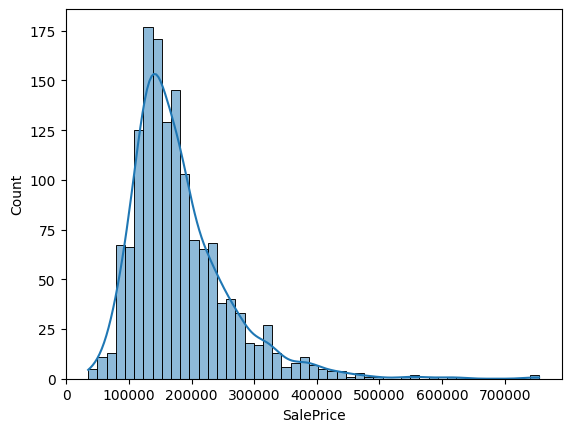

In [4]:
sns.histplot(data=df, x="SalePrice", kde=True)


# Data Analysis

## Categorical Value Analysis

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe if dataframe[col].dtype == "O"]

    num_but_cat = [col for col in dataframe if len(dataframe[col].unique()) < cat_th
                   and dataframe[col].dtype != "O"]

    cat_but_car = [col for col in dataframe if len(dataframe[col].unique()) > car_th
                   and dataframe[col].dtype != "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("observations : ", dataframe.shape[0], end="\n\n")
    print("features : ", dataframe.shape[1], end="\n\n")
    print("Categorical columns : ", len(cat_cols), end="\n\n")
    print("Numerical columns : ", len(num_cols), end="\n\n")
    print("Categorical columns but not car columns : ", len(cat_but_car), end="\n\n")
    print("Numerical columns but not car columns : ", len(num_but_cat), end="\n\n")
    print("Categorical columns but not car columns : ", cat_cols, end="\n\n")
    print("Numerical columns but not car columns : ", num_but_cat, end="\n\n")
    print("Car columns : ", cat_but_car, end="\n\n")
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


observations :  2919

features :  81

Categorical columns :  53

Numerical columns :  28

Categorical columns but not car columns :  23

Numerical columns but not car columns :  10

Categorical columns but not car columns :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']

Numerical columns but not car columns :  ['OverallCon

In [6]:
def plot_interactive_cat(col_name):
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(9, 6))

    value_counts = df[col_name].value_counts()
    ratio = 100 * value_counts / len(df)
    summary_df = pd.DataFrame({col_name: value_counts, "Ratio (%)": ratio})
    if len(value_counts) < 10:
        ax = sns.countplot(x=col_name, data=df, palette="pastel")
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}\n({100 * height / len(df):.1f}%)',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    else:
        ax = sns.countplot(y=col_name, data=df, palette="pastel")
        for p in ax.patches:
            width = p.get_width()
            ax.annotate(f'{width}\n({100 * width / len(df):.1f}%)',
                        (width, p.get_y() + p.get_height() / 2),
                        ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                        textcoords='offset points')

    plt.title(f"Distribution of {col_name}")
    plt.show()
    return summary_df


dropdown = widgets.Dropdown(
    options=cat_cols,
    description='Select Column:',
    disabled=False,
)

widgets.interact(plot_interactive_cat, col_name=dropdown)


interactive(children=(Dropdown(description='Select Column:', options=('MSZoning', 'Street', 'Alley', 'LotShape…

<function __main__.plot_interactive_cat(col_name)>

## Numerical Value Analysis

In [7]:

def plot_interactive_num(col_name):
    plt.style.use("fivethirtyeight")
    plt.style.use("ggplot")
    sns.histplot(data=df, x=col_name, kde=True, bins=50)
    plt.xlabel(col_name)
    plt.title(col_name)
    plt.show()
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    return pd.DataFrame(df[col_name].describe(quantiles).T)


dropdown = widgets.Dropdown(
    options=num_cols,
    description='Select Column:',
    disabled=False,
)

widgets.interact(plot_interactive_num, col_name=dropdown)


interactive(children=(Dropdown(description='Select Column:', options=('Id', 'MSSubClass', 'LotFrontage', 'LotA…

<function __main__.plot_interactive_num(col_name)>

In [8]:
def plot_interactive_target(col_name, target):
    groupData = df.groupby(col_name)[target].mean()
    plt.style.use("ggplot")
    sns.barplot(x=groupData.index, y=groupData.values, palette="pastel")
    plt.xlabel(col_name)
    plt.ylabel(target)
    plt.title(target + " by " + col_name)
    plt.xticks(rotation=75)
    plt.show()
    return groupData


dropdown = widgets.Dropdown(
    options=cat_cols,
    description='Select Column:',
    disabled=False,
)
widgets.interact(plot_interactive_target, col_name=dropdown, target="SalePrice")

interactive(children=(Dropdown(description='Select Column:', options=('MSZoning', 'Street', 'Alley', 'LotShape…

<function __main__.plot_interactive_target(col_name, target)>

## Correlation Analysis

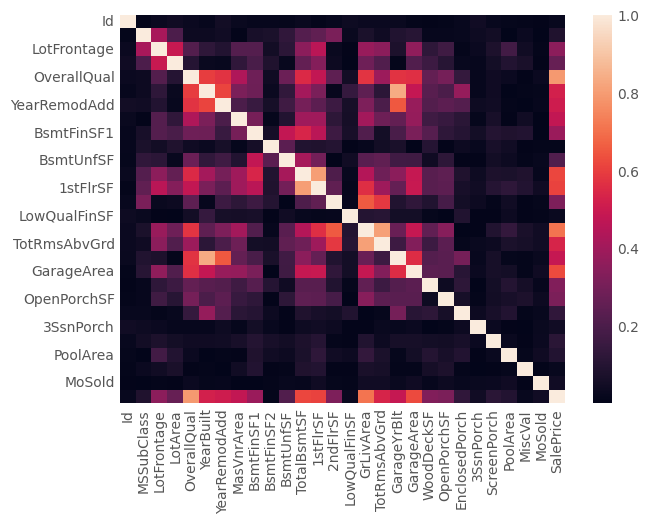

In [9]:
corr_matrix = df[num_cols].corr()
corr_matrix = corr_matrix.abs()
sns.heatmap(df[num_cols].corr().abs())
plt.show(block=True)

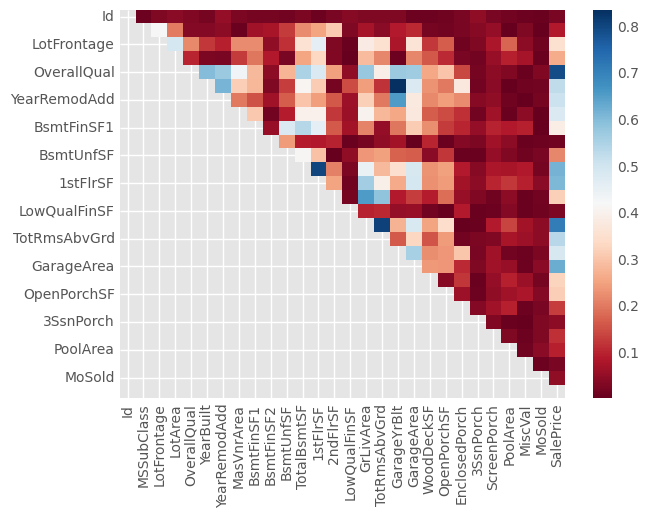

In [10]:
def high_corr_heatmap(dataframe, threshold=0.75, plot=False):
    """
    high correlation variable
    :param dataframe: 
    :param threshold:
    :param plot: 
    :return: high correlation variable list
    """
    corr_matrix = dataframe.corr()
    corr_matrix = abs(corr_matrix)
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > threshold)]
    if plot:
        sns.heatmap(upper_triangle_matrix, cmap="RdBu")
        plt.show(block=True)
    return drop_list


high_corr_variable = high_corr_heatmap(df[num_cols], threshold=0.75, plot=True)


# Feature Engineering

## Outlier Detection

In [11]:
def outlier_graph_widgets(dataframe,cols_name):
    # Outlier Dedection
    def plot_interactive_graph_boxplot(col_name):
        plt.style.use("fivethirtyeight")
        plt.figure(figsize=(12, 9))
        sns.boxplot(x=col_name, data=dataframe)
        plt.show()
        return pd.DataFrame(df[col_name].describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]).T)
    
    
    dropdown = widgets.Dropdown(
        options=cols_name,
        description='Select Column:',
        disabled=False,
    )
    widgets.interact(plot_interactive_graph_boxplot, col_name=dropdown)

In [12]:
outlier_graph_widgets(df,num_cols)

interactive(children=(Dropdown(description='Select Column:', options=('Id', 'MSSubClass', 'LotFrontage', 'LotA…

In [13]:
def outlier_thresholds_withQuantile(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    """ outlier detection by quantile    """
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


def outlier_thresholds_withMAD(dataframe, variable, k=3):
    """ outlier detection by MAD (median absolute deviation) """
    MAD = median(abs(dataframe[variable] - median(dataframe[variable])))
    low_limit = median(dataframe[variable]) - k * MAD
    up_limit = median(dataframe[variable]) + k * MAD
    return low_limit, up_limit


def check_outlier(dataframe, col_name, funcName):
    """  """
    low_limit, up_limit = funcName(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


def view_outlier_method(dataframe, cols):
    outlier_results = []
    for col in cols:
        if col != "SalePrice":
            quantile_outlier = check_outlier(dataframe, col, outlier_thresholds_withQuantile)
            mad_outlier = check_outlier(dataframe, col, outlier_thresholds_withMAD)
            outlier_results.append([col, quantile_outlier, mad_outlier])

    outlier_df = pd.DataFrame(outlier_results, columns=["Variable", "Quantile_Outlier", "MAD_Outlier"])

    pivot_table = outlier_df.pivot_table(index="Variable", values=["Quantile_Outlier", "MAD_Outlier"],
                                         aggfunc=lambda x: x)
    return pivot_table


# Outlier Suppression
def replace_with_thresholds(dataframe, variable, funcName):
    low_limit, up_limit = funcName(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [14]:
df_MAD = df.copy()
df_quantile = df.copy()
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df_quantile, col, outlier_thresholds_withQuantile)
        replace_with_thresholds(df_MAD, col, outlier_thresholds_withMAD)

print("Dataframe")
view_outlier_method(df, num_cols)

Dataframe


,MAD_Outlier,Quantile_Outlier
Variable,,
1stFlrSF,True,True
2ndFlrSF,True,False
3SsnPorch,True,True
BsmtFinSF1,True,True
BsmtFinSF2,True,True
BsmtUnfSF,True,False
EnclosedPorch,True,True
GarageArea,True,False
GarageYrBlt,True,True


In [15]:
print("df_MAD")
view_outlier_method(df_MAD, num_cols)

df_MAD


,MAD_Outlier,Quantile_Outlier
Variable,,
1stFlrSF,False,False
2ndFlrSF,False,False
3SsnPorch,False,False
BsmtFinSF1,False,False
BsmtFinSF2,False,False
BsmtUnfSF,False,False
EnclosedPorch,False,False
GarageArea,False,False
GarageYrBlt,False,True


In [16]:
print("df_quantile")
view_outlier_method(df_quantile, num_cols)

df_quantile


,MAD_Outlier,Quantile_Outlier
Variable,,
1stFlrSF,True,False
2ndFlrSF,True,False
3SsnPorch,False,False
BsmtFinSF1,True,False
BsmtFinSF2,True,False
BsmtUnfSF,True,False
EnclosedPorch,True,False
GarageArea,True,False
GarageYrBlt,False,False


## Choosing the right statistical path

In [17]:
def plot_interactive_cat(col_name):
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12, 9))
    sns.boxplot(x=col_name, data=df, ax=ax[0], color="r").set_title("Original")
    sns.boxplot(x=col_name, data=df_quantile, ax=ax[1], color="g").set_title("Quantile")
    sns.boxplot(x=col_name, data=df_MAD, ax=ax[2], color="b").set_title("MAD")
    plt.show()


dropdown = widgets.Dropdown(
    options=num_cols,
    description='Select Column:',
    disabled=False,
)

widgets.interact(plot_interactive_cat, col_name=dropdown)


interactive(children=(Dropdown(description='Select Column:', options=('Id', 'MSSubClass', 'LotFrontage', 'LotA…

<function __main__.plot_interactive_cat(col_name)>

## Missing Data Analysis

              n_miss     percent
PoolQC          2909      99.657
MiscFeature     2814      96.403
Alley           2721      93.217
Fence           2348      80.439
MasVnrType      1766      60.500
SalePrice       1459      49.983
FireplaceQu     1420      48.647
LotFrontage      486      16.650
GarageCond       159       5.447
GarageYrBlt      159       5.447
GarageFinish     159       5.447
GarageQual       159       5.447
GarageType       157       5.379
BsmtExposure      82       2.809
BsmtCond          82       2.809
BsmtQual          81       2.775
BsmtFinType2      80       2.741
BsmtFinType1      79       2.706
MasVnrArea        23       0.788
MSZoning           4       0.137
Functional         2       0.069
BsmtHalfBath       2       0.069
BsmtFullBath       2       0.069
Utilities          2       0.069
KitchenQual        1       0.034
TotalBsmtSF        1       0.034
BsmtUnfSF          1       0.034
GarageCars         1       0.034
GarageArea         1       0.034
BsmtFinSF2

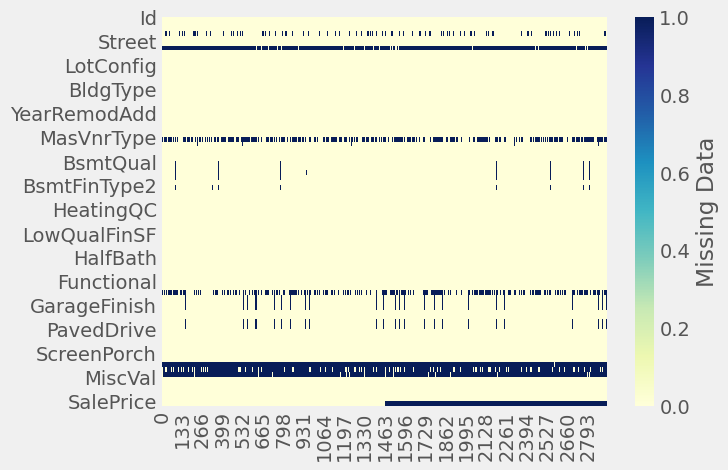

In [18]:
def missing_data_analysis(dataframe, col=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    percent = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    mis_df = pd.concat([n_miss, percent], axis=1, keys=["n_miss", "   percent"])
    print(mis_df)
    if col:
        return mis_df

    if plot:
        plt.style.use("fivethirtyeight")
        sns.heatmap(dataframe.isna().transpose(),
                    cmap="YlGnBu",
                    cbar_kws={'label': 'Missing Data'})
        plt.show(block=True)


missing_data_analysis(df_MAD, plot=True)

              n_miss     percent
PoolQC          2909      99.657
MiscFeature     2814      96.403
Alley           2721      93.217
Fence           2348      80.439
MasVnrType      1766      60.500
SalePrice       1459      49.983
FireplaceQu     1420      48.647
LotFrontage      486      16.650
GarageCond       159       5.447
GarageYrBlt      159       5.447
GarageFinish     159       5.447
GarageQual       159       5.447
GarageType       157       5.379
BsmtExposure      82       2.809
BsmtCond          82       2.809
BsmtQual          81       2.775
BsmtFinType2      80       2.741
BsmtFinType1      79       2.706
MasVnrArea        23       0.788
MSZoning           4       0.137
Functional         2       0.069
BsmtHalfBath       2       0.069
BsmtFullBath       2       0.069
Utilities          2       0.069
KitchenQual        1       0.034
TotalBsmtSF        1       0.034
BsmtUnfSF          1       0.034
GarageCars         1       0.034
GarageArea         1       0.034
BsmtFinSF2

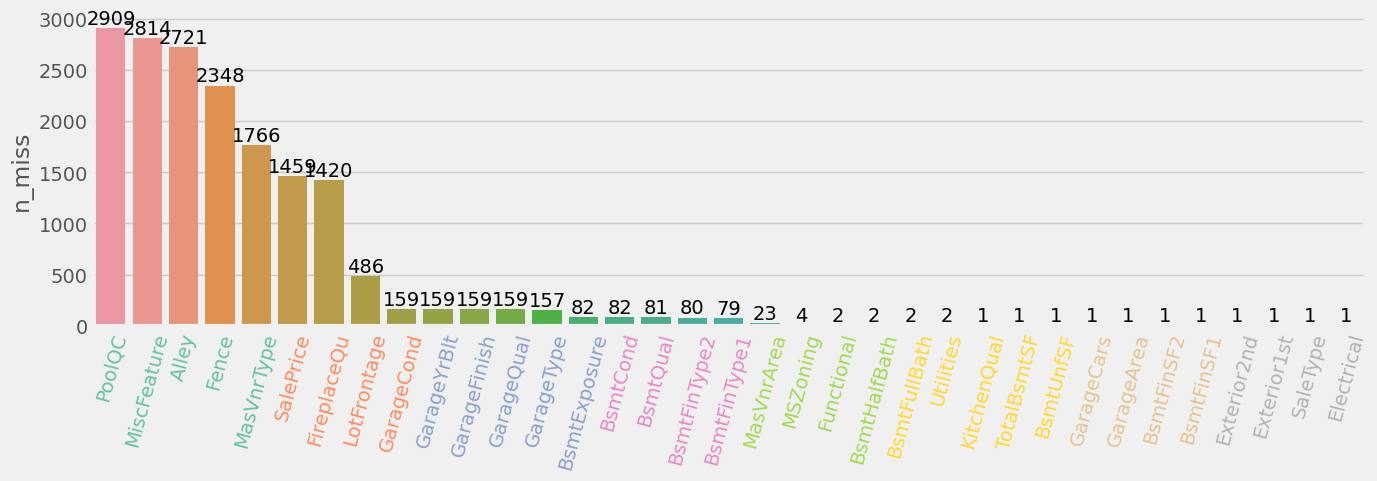

In [19]:
def hist_nan_analysis(plot=True):
    na_columns = missing_data_analysis(df_MAD, col=True)
    plt.figure(figsize=(14, 5))
    sns.barplot(data=na_columns, x=na_columns.index, y='n_miss')
    plt.xticks(rotation=75)
    if plot:
        try:
            [plt.setp(label, color=plt.cm.Set2(i / len(na_columns))) for i, label in enumerate(plt.gca().get_xticklabels())]
            bars = plt.gca().containers
            for bar in bars:
                for rect in bar.patches:
                    height = rect.get_height()
                    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')
            plt.tight_layout()
            plt.show()
        except ZeroDivisionError as e:
            print("ZeroDivisionError")
   

hist_nan_analysis()

In [20]:
df_MAD["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [21]:
df_MAD["Alley"].fillna("None", inplace=True)
df_MAD["Fence"].fillna("None", inplace=True)
df_MAD["MasVnrType"].fillna("None", inplace=True)


In [22]:
for col in cat_cols:
    df_MAD[col].fillna("None", inplace=True)
    
for col in num_cols:
    df_MAD[col].fillna(np.mean(df_MAD[col]), inplace=True)

In [23]:
col_name= "LotFrontage"
col_df=df_MAD[[col_name]]

imputer = KNNImputer(n_neighbors=5)

column_filled = imputer.fit_transform(col_df)
df_MAD[col_name] = column_filled


## Rare Analysis and encoding process

In [24]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


rare_encoder(df_MAD, 0.01)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,0,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,0,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,0,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,0,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,264.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,0,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,780.000,TA,TA,Y,0,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,140,RM,21.000,3336,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,0,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,None,None,1978.087,None,0.000,210.000,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,180921.196
2915,2916,140,RM,21.000,3336,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,0,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,None,Rare,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,180921.196
2916,2917,20,RL,140.000,15570,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,

In [25]:
df_MAD["NEW_1st*GrLiv"] = df_MAD["1stFlrSF"] * df_MAD["GrLivArea"]


df_MAD["NEW_Garage*GrLiv"] = (df_MAD["GarageArea"] * df_MAD["GrLivArea"])

# Total Finished Basement Area
df_MAD["NEW_TotalBsmtFin"] = df_MAD.BsmtFinSF1 + df_MAD.BsmtFinSF2  

# Porch Area
df_MAD["NEW_PorchArea"] = df_MAD.OpenPorchSF + df_MAD.EnclosedPorch + df_MAD.ScreenPorch + df_MAD["3SsnPorch"] + df_MAD.WoodDeckSF 


# Total House Area
df_MAD["NEW_TotalFlrSF"]=df_MAD["1stFlrSF"]+df_MAD["2ndFlrSF"]

df_MAD["NEW_TotalHouseArea"] = df_MAD.NEW_TotalFlrSF + df_MAD.TotalBsmtSF  

df_MAD["NEW_TotalSqFeet"] = df_MAD.GrLivArea + df_MAD.TotalBsmtSF  

# Lot Ratio
df_MAD["NEW_LotRatio"] = df_MAD.GrLivArea / df_MAD.LotArea  

df_MAD["NEW_RatioArea"] = df_MAD.NEW_TotalHouseArea / df_MAD.LotArea  

df_MAD["NEW_GarageLotRatio"] = df_MAD.GarageArea / df_MAD.LotArea  

# MasVnrArea
df_MAD["NEW_MasVnrRatio"] = df_MAD.MasVnrArea / df_MAD.NEW_TotalHouseArea 

# Dif Area
df_MAD["NEW_DifArea"] = (df_MAD.LotArea - df_MAD["1stFlrSF"] - df_MAD.GarageArea - df_MAD.NEW_PorchArea - df_MAD.WoodDeckSF) 

df_MAD["NEW_OverallGrade"] = df_MAD["OverallQual"] * df_MAD["OverallCond"]  

df_MAD["NEW_Restoration"] = df_MAD.YearRemodAdd - df_MAD.YearBuilt  

df_MAD["NEW_HouseAge"] = df_MAD.YrSold - df_MAD.YearBuilt  

df_MAD["NEW_RestorationAge"] = df_MAD.YrSold - df_MAD.YearRemodAdd  

df_MAD["NEW_GarageAge"] = df_MAD.GarageYrBlt - df_MAD.YearBuilt  

df_MAD["NEW_GarageRestorationAge"] = np.abs(df_MAD.GarageYrBlt - df_MAD.YearRemodAdd) 

df_MAD["NEW_GarageSold"] = df_MAD.YrSold - df_MAD.GarageYrBlt  

drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope", "Heating", "PoolQC", "MiscFeature",
             "Neighborhood"]


df_MAD.drop(drop_list, axis=1, inplace=True)

In [26]:
import numpy as np

# create to new feature
test_df["NEW_1st*GrLiv"] = test_df["1stFlrSF"] * test_df["GrLivArea"]

test_df["NEW_Garage*GrLiv"] = test_df["GarageArea"] * test_df["GrLivArea"]

# Total Finished Basement Area
if "BsmtFinSF1" in test_df and "BsmtFinSF2" in test_df:
    test_df["NEW_TotalBsmtFin"] = test_df.BsmtFinSF1 + test_df.BsmtFinSF2
else:
    test_df["NEW_TotalBsmtFin"] = np.nan  # veya 0

# Porch Area
test_df["NEW_PorchArea"] = (
    test_df.OpenPorchSF +
    test_df.EnclosedPorch +
    test_df.ScreenPorch +
    test_df["3SsnPorch"] +
    test_df.WoodDeckSF
)

# Total House Area
test_df["NEW_TotalFlrSF"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"]

test_df["NEW_TotalHouseArea"] = test_df.NEW_TotalFlrSF + test_df.TotalBsmtSF

test_df["NEW_TotalSqFeet"] = test_df.GrLivArea + test_df.TotalBsmtSF

# Lot Ratio
test_df["NEW_LotRatio"] = test_df.GrLivArea / test_df.LotArea

test_df["NEW_RatioArea"] = test_df.NEW_TotalHouseArea / test_df.LotArea

test_df["NEW_GarageLotRatio"] = test_df.GarageArea / test_df.LotArea

# MasVnrArea
if "MasVnrArea" in test_df and "NEW_TotalHouseArea" in test_df:
    test_df["NEW_MasVnrRatio"] = test_df.MasVnrArea / test_df.NEW_TotalHouseArea
else:
    test_df["NEW_MasVnrRatio"] = np.nan  # veya 0

# Dif Area
test_df["NEW_DifArea"] = (
    test_df.LotArea - 
    test_df["1stFlrSF"] - 
    test_df.GarageArea - 
    test_df.NEW_PorchArea - 
    test_df.WoodDeckSF
)

test_df["NEW_OverallGrade"] = test_df["OverallQual"] * test_df["OverallCond"]

test_df["NEW_Restoration"] = test_df.YearRemodAdd - test_df.YearBuilt

test_df["NEW_HouseAge"] = test_df.YrSold - test_df.YearBuilt

test_df["NEW_RestorationAge"] = test_df.YrSold - test_df.YearRemodAdd

if "GarageYrBlt" in test_df:
    test_df["NEW_GarageAge"] = test_df.GarageYrBlt - test_df.YearBuilt
    test_df["NEW_GarageRestorationAge"] = np.abs(test_df.GarageYrBlt - test_df.YearRemodAdd)
    test_df["NEW_GarageSold"] = test_df.YrSold - test_df.GarageYrBlt
else:
    test_df["NEW_GarageAge"] = np.nan
    test_df["NEW_GarageRestorationAge"] = np.nan
    test_df["NEW_GarageSold"] = np.nan

# droping needless rows
drop_list = [
    "Street", "Alley", "LandContour", "Utilities", "LandSlope", 
    "Heating", "PoolQC", "MiscFeature", "Neighborhood"
]

test_df.drop(drop_list, axis=1, inplace=True, errors='ignore')
test_df.shape

(1459, 90)

In [27]:
df_MAD

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalFlrSF,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1,60,RL,65.000,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,Ex,Y,SBrkr,856,0,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,208500.000,1463760,937080.000,706.000,61,856,1712.000,2566.000,0.202,0.203,0.065,0.114,6985.000,35,0,5,5,0.000,0.000,5.000
1,2,20,RL,80.000,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,0,0,0,0,0,0,None,0,5,2007,WD,Normal,181500.000,1592644,580520.000,978.000,0,1262,2524.000,2524.000,0.131,0.263,0.048,0.000,7878.000,48,0,31,31,0.000,0.000,31.000
2,3,60,RL,68.000,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,Ex,Y,SBrkr,920,0,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,223500.000,1643120,1085888.000,486.000,42,920,1840.000,2706.000,0.159,0.164,0.054,0.088,9680.000,35,1,7,6,0.000,1.000,7.000
3,4,70,RL,60.000,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,Gd,Y,SBrkr,961,0,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,0,0,0,0,None,0,2,2006,WD,Abnorml,140000.000,1650037,1102314.000,216.000,35,961,1717.000,2473.000,0.180,0.180,0.067,0.000,7912.000,35,55,91,36,83.000,28.000,8.000
4,5,60,RL,84.000,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,264.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,Ex,Y,SBrkr,1145,0,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,780.000,TA,TA,Y,0,84,0,0,0,0,None,0,12,2008,WD,Normal,250000.000,2516710,1714440.000,655.000,84,1145,2290.000,3343.000,0.154,0.161,0.055,0.115,12251.000,40,0,8,8,0.000,0.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,140,RM,21.000,3336,Reg,Inside,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,Gd,Y,SBrkr,546,0,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,None,None,1978.087,None,0.000,210.000,None,None,Y,0,0,0,0,0,0,None,0,6,2006,WD,Normal,180921.196,596232,229320.000,0.000,0,546,1092.000,1638.000,0

In [28]:
encoder = OneHotEncoder(sparse_output=False)
cat_cols_one_hat=[col for col in cat_cols if (col in drop_list)!=True]
one_hot_encoded = encoder.fit_transform(df[cat_cols_one_hat])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols_one_hat))
df_encoded = pd.concat([df_MAD, one_hot_df], axis=1)
encoded_test=pd.concat([test_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(cat_cols_one_hat, axis=1)
encoded_test = encoded_test.drop(cat_cols_one_hat, axis=1)

# Display the resulting dataframe
df_encoded


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalFlrSF,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml

In [29]:
y=df_encoded[df_encoded["SalePrice"].isnull()==False]["SalePrice"]
X=df_encoded.drop("SalePrice",axis=1)



# Modeling 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

In [32]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 54899.0879 (LR) 
RMSE: 52135.7054 (Ridge) 
RMSE: 52933.7969 (Lasso) 
RMSE: 49915.2019 (ElasticNet) 
RMSE: 54342.9126 (KNN) 
RMSE: 26149.8314 (CART) 
RMSE: 19735.7309 (RF) 
RMSE: 43117.1351 (SVR) 
RMSE: 24053.7151 (GBM) 
RMSE: 23805.6644 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6468
[LightGBM] [Info] Number of data points in the train set: 2335, number of used features: 224
[LightGBM] [Info] Start training from score 180562.184308
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

In [33]:
print(df['SalePrice'].mean())
df['SalePrice'].std()

180921.19589041095


79442.50288288662

In [34]:

lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6468
[LightGBM] [Info] Number of data points in the train set: 2335, number of used features: 224
[LightGBM] [Info] Start training from score 180562.184308
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6476
[LightGBM] [Info] Number of data points in the train set: 2335, number of used features: 223
[LightGBM] [Info] Start training from score 181445.746621
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[L

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6547
[LightGBM] [Info] Number of data points in the train set: 2919, number of used features: 232
[LightGBM] [Info] Start training from score 180921.199506


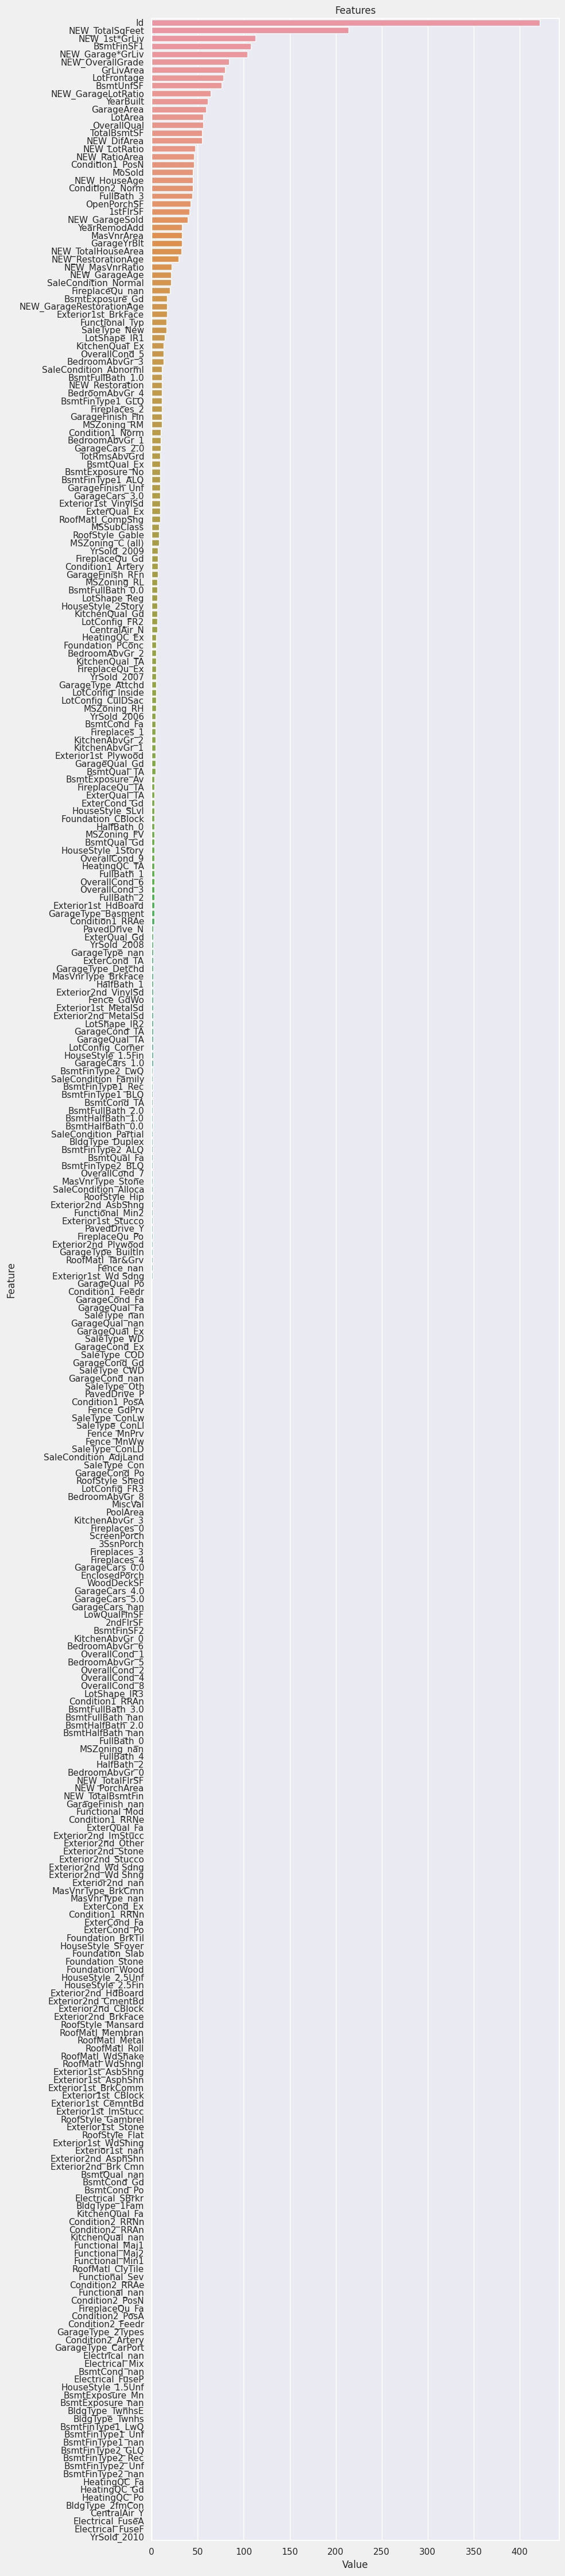

In [35]:
def plot_importance(model, features, num=len(X), save=False):
        feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
        if len(features) != 0:
            plt.figure(figsize=(10, 45))
            sns.set(font_scale=1)
            sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
            plt.title("Features")
            plt.tight_layout()
            plt.show()
            if save:
                plt.savefig("importances.png")


model = LGBMRegressor()
model.fit(X, y)

plot_importance(model=model,features= X)

# Kaggle Sumbit Format

In [36]:
model = LGBMRegressor()
model.fit(X, y)
predictions = model.predict(encoded_test, axis=1)

dictionary = {"Id": encoded_test.index, "SalePrice": predictions}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv("housePricePredictions.csv", index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6547
[LightGBM] [Info] Number of data points in the train set: 2919, number of used features: 232
[LightGBM] [Info] Start training from score 180921.199506
[LightGBM] [Warning] Unknown parameter: axis
